<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Confidence Intervals for Statistical Measurements

_Authors: Kiefer Katovich (SF), Matt Brems (DC), Justin Pounders (ATL)_

---

### Learning Objectives
- Describe and calculate confidence intervals for the mean.
- Interpret the meaning of the confidence interval.
- Define the null and alternative hypotheses.
- Perform a two-sample t-test.
- Define the t-statistics and p-value.
- List the steps of hypothesis testing.

### Lesson Guide
- [Review of Sample Statistics and Parameters](#review-statistics-parameters)
- [The Standard Error](#standard-error)
- [The CLT and Uncertainty of the Sample Mean](#clt-uncertainty)
- [Confidence Intervals](#confidence-intervals)
- [Interpreting the Confidence Interval](#interpreting-ci)



In [1]:
# Bring in our libraries, set some variables for the whole notebook
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='review-statistics-parameters'></a>

### Review and Introduction: Statistics Surrounding the Ages of Single People

---

Below is a random sample of data about age taken from a survey conducted by a bank. The data is specifically a subset of people who have classified themselves as "single" as opposed to "married." 

We are interested in describing our sample using **descriptive statistics**. We are also interested in making statements about the overall population that the sample was drawn from (i.e., all single people who would conceivably take the bank survey) using **inferential statistics**.

In [2]:
single = np.array([24, 26, 35, 32, 38, 35, 31, 43, 40, 42, 39, 48, 37, 27, 33, 33, 34,
                   37, 33, 26, 30, 30, 30, 31, 33, 35, 43, 30, 35, 26, 23, 27, 54, 35,
                   29, 28, 37, 33, 34, 32, 29, 43, 29, 36, 36, 34, 39, 33, 30, 32, 23,
                   30, 31, 38, 35, 22, 59, 20, 45, 33, 35, 33, 23, 58, 33, 30, 38, 28,
                   50, 31, 38, 42, 41, 33, 29, 29, 31, 30, 28, 27, 29, 38, 36, 56, 36,
                   31, 30, 29, 25, 41, 47, 34, 38, 50, 23, 28, 35, 32, 36, 28, 39, 33,
                   25, 36, 27, 30, 29, 42, 43, 20, 26, 53, 41, 27, 31, 33, 38, 37, 31,
                   28, 25, 47, 38, 41, 26, 26, 25, 32, 32, 23, 31, 51, 49, 32, 48, 44,
                   30, 31, 34, 37, 31, 32, 24, 38, 38, 39, 29, 25, 29, 31, 24, 35, 28,
                   24, 24, 35, 36, 21, 56, 54, 28, 32, 27, 30, 31, 31, 27, 32, 30, 29,
                   27, 26, 36, 27, 32, 32, 38, 41, 33, 33, 26, 29, 27, 42, 35, 32, 35,
                   43, 32, 22, 32, 37, 30, 39, 28, 33, 25, 34, 39, 31])

Plotting a histogram can provide an effective visual description of the data before we even calculate any statistical measures.

**The following code plots the histogram for the distribution of ages using `matplotlib` and `seaborn`.**

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


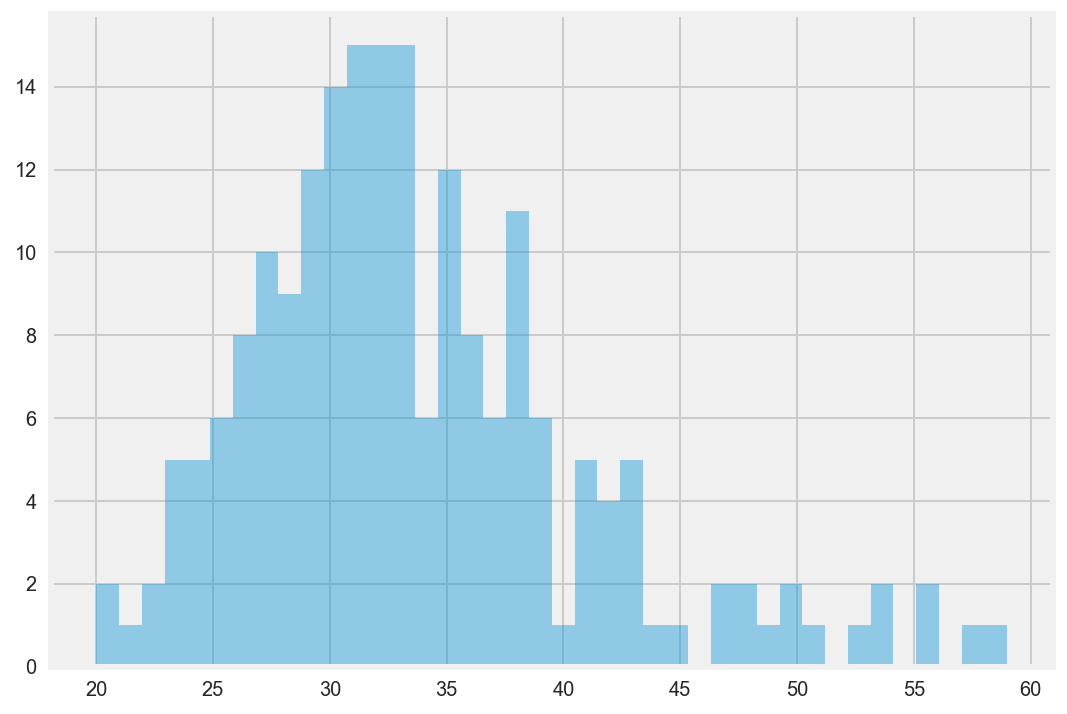

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(single, bins=40, kde=False)

**Calculate the mean and the standard deviation of the data. What do these statistics tell us specifically?**

In [4]:
print(np.mean(single))
print(np.std(single))

33.555
7.461030424813988


_This tells us that the mean of our sample is 33.55 years old._   
_The standard deviation, which is the approximate average distance of any 
observed age from the mean age, is 7.46 years._ 

In [5]:
std = np.std(single)
n = len(single)
sem = std/np.sqrt(n)
print('SEM:', sem)

SEM: 0.5275745208025118


<a id='clt-uncertainty'></a>

### Review: The Central Limit Theorem and Uncertainty of the Sample Mean

---

Recall that the central limit theorem (CLT) dictates that the distribution of sample means (calculated across different random samples from our overall population) will be normally distributed. 

Using the CLT, we are able to state that:

> Our sample mean (33.55) falls somewhere on the normal distribution of all sample means calculated from random samples drawn from the overall population of ages.

We also know from the CLT that the standard deviation of this normal distribution sets parameters to be $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the standard deviation of the population. 

Look familiar? Replacing $\sigma$ with our estimate of the standard deviation ($s$), we set parameters for the standard deviation of the distribution using our measure of the standard error of the mean, $\frac{s}{\sqrt{n}}$.

Then, we use our sample mean — our **point estimate** — as the best estimate of the population mean. Set parameters for the distribution of sample means like so:

### $$ \bar{X} \text{ ~ } N(\bar{x}, \frac{s_{x}}{\sqrt{n}} )$$



What this equation is saying is **$\bar{X}$** has a standard normal distribution( $N$ ) with a mean of $\bar{x}$ and standard deviation of $\frac{s_{x}}{\sqrt{n}}$ .

In this equation, **$\bar{X}$** is a random variable from the _sample space_(a.k.a., $\Omega$).  The sample space is the set containing all possible permutations of $\bar{x}$(_our_ sample mean).  Thus we are saying that any and all of our possible sample means will fall within the normal distribution defined above.

**The code below visualizes this distribution with `matplotlib` and `scipy`.**

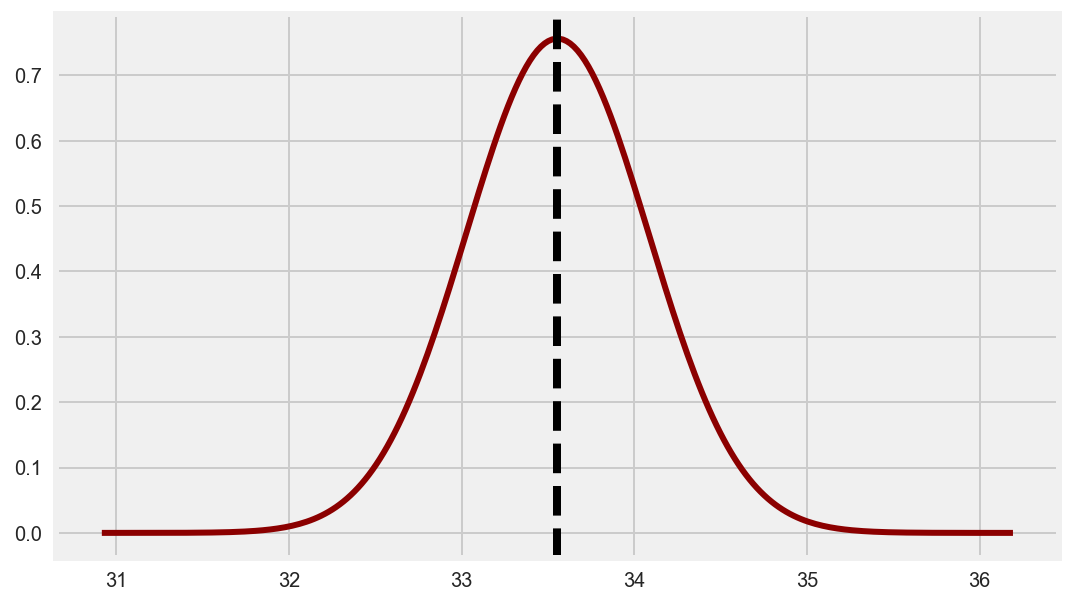

In [6]:
single_mean = np.mean(single)
single_sem = np.std(single)/np.sqrt(len(single))

# Generate points on the x axis:
xpoints = np.linspace(single_mean - single_sem*5, single_mean + single_sem*5, 250)

# Use stats.norm.pdf to get values on the probability density function for the normal distribution:
ypoints = stats.norm.pdf(xpoints, single_mean, single_sem)

# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure:
ax = fig.gca()

# Plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(single_mean, linewidth=4, ls='dashed', c='black')

**What does this look like for our original distribution?**

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


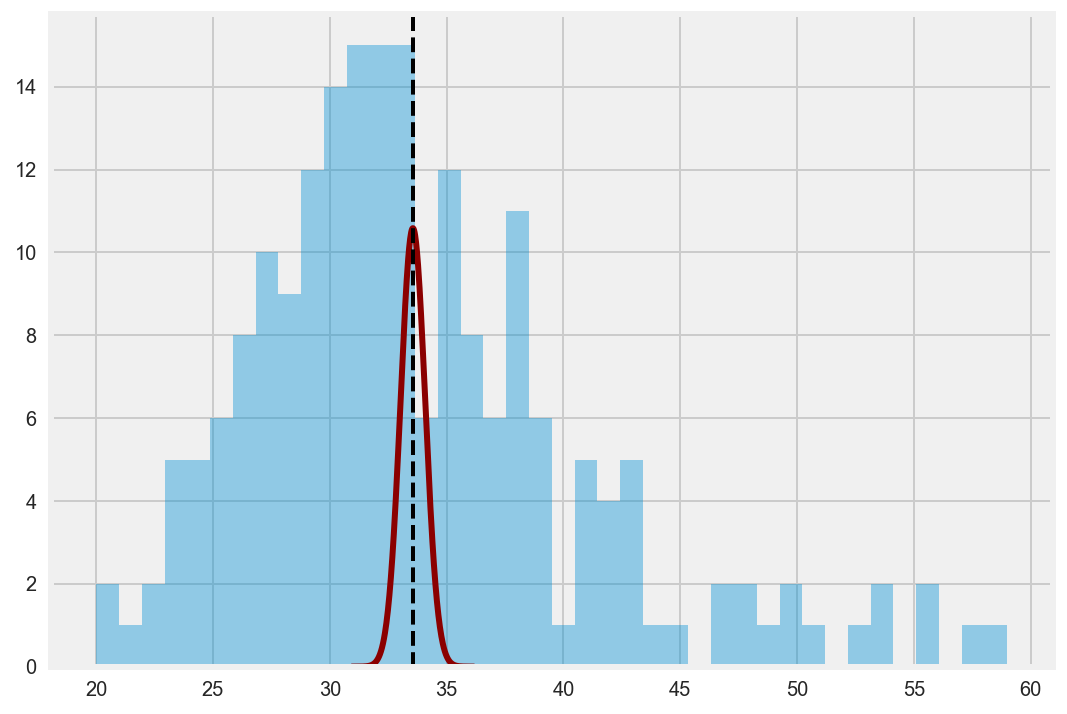

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(single, bins=40, kde=False)
ax.plot(xpoints, ypoints*14, linewidth=3, color='darkred')
ax.axvline(single_mean, linewidth=2, ls='dashed', c='black')

### What's next? Inference!

What is inference?  In essence, we want to _infer_ something about a population from a sample.

There are two main types of questions we ask when conducting inference on parameters.

- What is a range of likely values for my parameter?  This will be answered by **confidence intervals**.
- Is this a likely value for my parameter?  This will be answered by **hypothesis testing**.

<a id='confidence-intervals'></a>

## Confidence intervals

---

A confidence interval describes a set of possible values for the parameter based on a statistic. Confidence intervals will be centered at the point estimate and typically include +/- a few standard errors.

Because the mean statistic is normally distributed, according to the CLT, our confidence interval for the sample mean will be:

### $$ \text{CI} = \text{point estimate} \pm \text{multiplier} \cdot \text{standard error} $$

### $$\text{CI} = \bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$

$z_{\alpha/2}$ is the z-score on the unit **Z ~ N(0, 1)** distribution that specifies the *degree* of certainty we want. For now, you can ignore the $\alpha/2$ part; this relates to the concept of Type I error, which we will cover later. What is important now is that, the larger the z-score, the greater the area under the normal distribution of sample means covered by the confidence interval.

**If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:**
- **90%**: The z-score multiplier should be **z = 1.645**, because 90% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -1.645 and 1.645.
- **95%**: The z-score multiplier should be **z = 1.96**, because 95% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -1.96 and 1.96.
- **99%**: The z-score multiplier should be **z = 2.575**, because 99% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -2.575 and 2.575.



**Example: Calculate the 90% CI for our data.**

In [ ]:
z = 1.645  # for 90%
ci_lower = single_mean-z*single_sem
ci_upper = single_mean+z*single_sem

**The plot below shows these z-score bounds on the $Z \sim N(0, 1)$ distribution:**

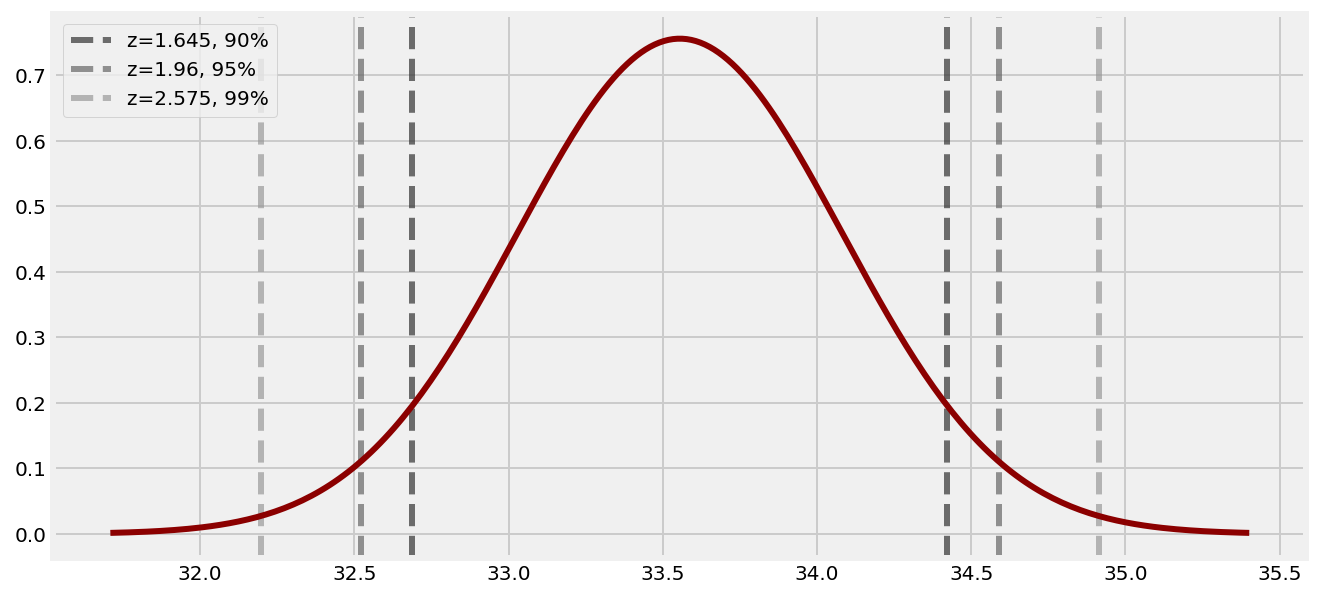

In [12]:
# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

zx = np.linspace(single_mean-3.5*single_sem, single_mean+3.5*single_sem, 250)

Z = stats.norm(single_mean, single_sem)
zy = Z.pdf(zx)

# 90%:
ax.axvline(single_mean-1.645*single_sem, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(single_mean+1.645*single_sem, ls='dashed', lw=3, color='#333333', alpha=0.7, label='z=1.645, 90%')

# 95%:
ax.axvline(single_mean-1.96*single_sem, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(single_mean+1.96*single_sem, ls='dashed', lw=3, color='#666666', alpha=0.7, label='z=1.96, 95%')

# 99%:
ax.axvline(single_mean-2.575*single_sem, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(single_mean+2.575*single_sem, ls='dashed', lw=3, color='#999999', alpha=0.7, label='z=2.575, 99%')

ax.plot(zx, zy, linewidth=3, color='darkred')
ax.legend(loc='upper left')

In [14]:
stats.norm.interval(0.95, single_mean, single_sem)

(32.5209729400661, 34.5890270599339)

<a id='interpreting-ci'></a>

### Interpreting the Confidence Interval

---

Suppose a 95% confidence interval for the mean number of burritos I eat in a week is [2.5, 5.5]. There are two interpretations we can derive from this, and one of them is wrong.


**Interpretation 1 (incorrect):**
> There is a 95% probability that the number of burritos I eat in a week is between 2.5 and 5.5.

**Interpretation 2 (correct):**
 >If we pulled 100 samples and constructed confidence intervals in the same manner, we expect that 95 of the intervals would contain the true mean of  burritos I eat in a week.




Why is interpretation 1 wrong? It assigns a probability to the true value. In Frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

This is a critical difference in Frequentist statistics (vs. Bayesian): our data has a probability of occuring, but there is no probability regarding possible values for the true parameter.

[This blog post has a great discussion of the difference between the Frequentist confidence interval and the Bayesian credible interval.](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/)

**We can also reframe this statement in terms of the random sampling procedure:**

Typically, you will see confidence intervals expressed as...
> _We are 95% confident that the mean number of burritos I eat each week is between 2.5 and 5.5._

While the above is the common shorthand, we can also think about a supplementary statement...
> _We are also 5% confident that the mean number of burritos I eat each week does not fall in between 2.5 and 5.5. _

**Tip:**  It is the random data and mathmatical process that you are measuring when expressing a confidence interval. 

[This post has more examples and information on the correct way to interpret Confidence Intervals](http://www.mathbootcamps.com/interpreting-confidence-intervals/)

## Hypothesis Testing

<a id='frequentist-hypothesis-testing'></a>

### Frequentist Hypothesis Testing: A Drug Efficacy Example

---

Frequentist methods lend themselves well to the concepts of experimental design. For example, say we are testing the efficacy of a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to recieve the treatment.
- We know our sample is selected from a broader, unknown population pool.
- We can imagine that, in a hypothetical parallel world, we could have ended up with a different random sample of subjects from the population pool.


<a id='null-hypothesis'></a>

### The "Null" Hypothesis

---

The **null hypothesis** is a fundamental concept of Frequentist statistical tests. We typically denote the null hypothesis with **H0**. 

In our drug efficacy experiment example, our null hypothesis could be that there is no difference between a subject taking a placebo and and one taking the treatment drug.

In the context of experiments, we often talk about the "control" group and the "experimental" or "treatment" group. In our example, the control group is the one given the placebo and the treatment group is the one given the actual drug. We are interested in the average difference in blood pressure levels between the treatment and control groups.

> **H0:** The mean difference between treatment and control groups is zero.

<a id='alternative-hypothesis'></a>

### The "Alternative Hypothesis"

---

The **alternative hypothesis** is the outcome of the experiment that we hope to show. In our example, the alternative hypothesis is that there is in fact a mean difference in blood pressure between the treatment and control groups. 

> **H1:** The parameter of interest — our mean difference between treatment and control — is different than zero.

**NOTE:** The null and alternative hypotheses are concerned with the true values, or, in other words, the *parameter of the overall population*. Through the process of experimentation/hypothesis testing and statistical analysis of the results, we will make an *inference* about this population parameter.

<a id='t-tests'></a>

### Introduction to the T-Test

---

Say that, in our experiment, we measure the following results:

- The 50 subjects in the control group have an average systolic blood pressure of 121.38.
- The 50 subjects in the experimental/treatment group have an average systolic blood pressure of 111.56.

The difference between experimental and control groups is -9.82 points. But, with 50 subjects in each group, how confident can we be that this measured difference is real? We can perform what is known as a **t-test** to evaluate this.

First, we will calculate a **t-statistic**. The t-statistic is a measure of the degree to which our groups differ, standardized by the variance of our measurements.

Secondly, we will calculate a **p-value**. The p-value is a metric that indicates a probability that our measured difference was because of random chance in the sampling of subjects.

Five steps to hypothesis testing:
1. Construct a null hypothesis that you want to contradict and its complement, the alternative hypothesis.
2. Specify a level of significance.
3. Calculate your point estimate(s).
4. Calculate your test statistic.
5. Find your $p$-value and make a conclusion.

**We can set up the experimental and control observations below as `numpy` arrays.**

In [36]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

print(np.mean(control))
print(np.mean(experimental))
print(np.mean(experimental) - np.mean(control))

<a id='likelihood-data'></a>

### Step 1: Construct the null and alternative hypotheses

---

For our experiment, we will set up a null hypothesis and an alternative hypothesis:

> **H0:** The difference in systolic blood pressure between the experimental and control groups is 0.

> **H1:** The difference in systolic blood pressure between the experimental and control groups is not 0.

Likewise, our measured difference is **-9.82**.

Recall that, as Frequentists, we want to know:

### $$P(\text{data}\;|\;H_0)$$

**What is the probability that we observed this data, GIVEN a specified mean difference in blood pressure.**


### Step 2: Specify a level of significance

If $P(\text{data}\;|\;H_0)$ is "small" then our data probably does not support our null hypothesis.  But how "small" is small enough?

This is set by our level of significance, which we call $\alpha$.

Typically (and somewhat arbitrarily) the value $\alpha=0.05$ is used.  This means that there is a 5% chance that we will _incorrectly reject the null hypothesis_ (aka Type 1 error or false positive).  Put another way, there is a 5% chance that we will claim a significant difference in blood pressure between the two groups when in fact there is no (statistically significant) difference.

<a id='t-statistic'></a>

### Step 4: Calculating the T-Statistic

---

When comparing two means, the **t-statistic** is a classic metric for quantifying the difference between groups. In essence, our t-statistic will be a standardized version of the difference between groups where the standardization is adjusting for the variance in measurements.

When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

### $$t = \frac{\bar{x}_E - \bar{x}_C}{\sqrt {s^2 (\frac{1}{n_E} + \frac{1}{n_C})}}$$

In our example, $\bar{x}_E$ is the mean of our experimental group's sample measurements and $\bar{x}_C$ is the mean of our control group's sample measurements.

$n_E$ and $n_C$ are the number of observations in each group. 

The $s^2$ denotes our *sample variance*. In this version of the t-test, we are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but, in our case, it is a reasonable assumption.

The sample variance is calculated like so:

### $$ s^2 = \frac{\sum_{i=1}^{n_E} (x_i - \bar{x}_E)^2 + \sum_{j=1}^{n_C} (x_j - \bar{x}_C)^2}{ n_E + n_C -2} $$

This combines the variance of the two groups' measurements into a single pooled metric. 


**Let's do this calculation using `scipy.stats.ttest_ind`.**

> To try your skills at `numpy` and `python`, try doing this calculation by implementing the above equations on your own!

In [16]:
import scipy.stats as stats

In [28]:
result = stats.ttest_ind(experimental, control)
result.statistic, result.pvalue

(-1.8915462966190273, 0.061504240672530394)

In [29]:
t_stat, p_value = stats.ttest_ind(experimental, control)

<a id='visualizing-t-statistic'></a>

### Visualizing the T-Statistic

---

From the central limit theorem, we know that (with asymptotically infinite samples), the distribution of sample means drawn from a population is normal. In the case of smaller sample sizes, [we adjust this to be a more conservative student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

We can plot the student's t-distribution below. It is centered on 0, where a value of 0 corresponds to our null hypothesis. We can also plot a vertical line with our measured t-statistic.

In [19]:
# Generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

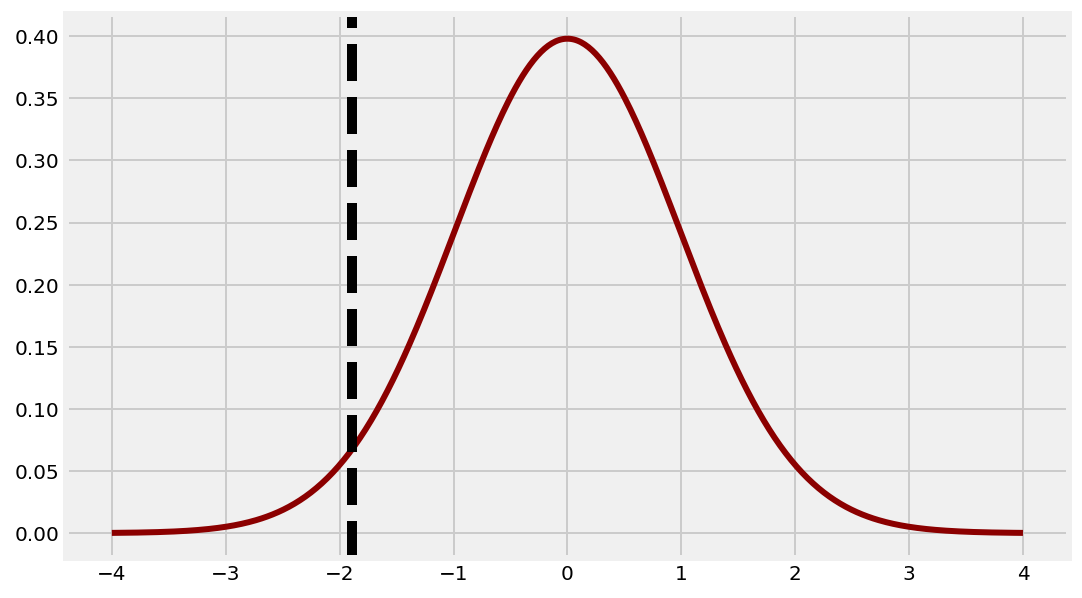

In [30]:
# Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure.
ax = fig.gca()

# Plot the lines using `matplotlib`'s plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# Plot a vertical line for our measured difference in rates' t-statistic.
ax.axvline(t_stat, color='black', linestyle='--', lw=5)

<a id='p-value'></a>

### Step 5: The P-Value

---

With the t-statistic, we are able to calculate the *statistical significance* of the test with a **p-value**. Statistical significance indicates our degree of confidence to infer a parameter about an overall population based on a statistic calculated from our sample.

Because of the unintuitive framing of Frequentist statistics, the p-value is often communicated and perceived incorrectly. It is important to remember that the p-value does **NOT** relate to _probability of the parameter_. In Frequentist statistics, the parameter, such as the mean difference, is **fixed**. Probability is instead associated with the *data*.

> **The p-value is the probability that, given that the null hypothesis `H0` is true, we could have ended up with a statistic at least as extreme as the one measured from our random sample of data from the true population.**

We have measured a difference in blood pressure of -9.82 between the experimental and control groups. We then calculated a t-statistic associated with this difference of -1.89. In our specific example:

> The p-value is the probability that, given there is a 0.0 true difference in blood pressure between experimental and control conditions (i.e., no effect of the drug), we were able to calculate a t-statistic at least as extreme as -1.89 from a random sample of data from the true population.

<a id='visualize-p-value'></a>

### Visualizing the P-Value

---

Our null hypothesis states that there is no difference between the groups, so the t-statistic would be 0. 

Recall that our alternative hypothesis is that the difference between groups is *not* 0. This could mean that the difference is greater *or* less than 0 — we haven't specified either. This is known as a **two-tailed t-test**, which is what we are currently conducting. The test is "two tailed" because, when we say "at least as extreme as ...," we are thinking about the *magnitude* of our t-statistic.

**We can plot the t-distribution again using our t-statistic of -1.89 as well as a t-statistic of 1.89 on the other side of the distribution.**

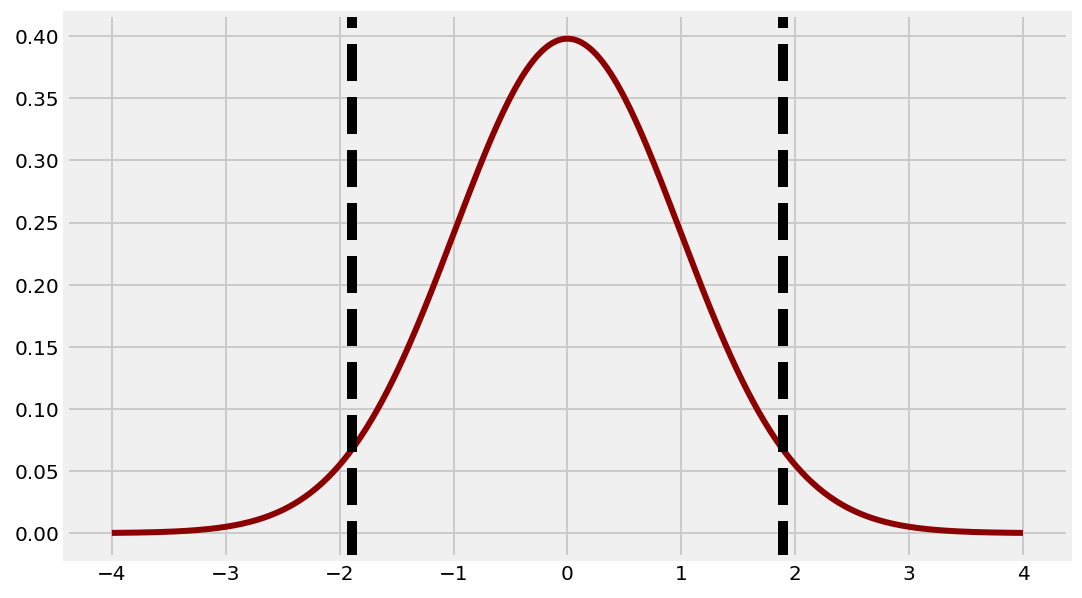

In [31]:
# Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

**Our p-value corresponds to the area under the curve of the distribution where the magnitude of the t-statistic is greater than or equal to the one we measured (shown with the dotted lines)**.

`stats.t.cdf()` is the cumulative distribution function and will calculate the area under the curve, up to a specified t-statistic. 

**Calculate the area under the tails of the t-distribution that falls beyond the dotted lines using the `.cdf()` function. This will verify that it's the same as the p-value calculated by `scipy`.**

In [35]:
n_exp = len(experimental)
n_con = len(control)
lower_tail = stats.t.cdf(-abs(t_stat), n_exp+n_con-2)
upper_tail = 1. - stats.t.cdf(abs(t_stat), n_exp+n_con-2)
p_value_man = lower_tail+upper_tail
print(p_value)
print(p_value_man)

0.061504240672530394
0.06150424067253037


### So what's the conclusion?

Remember that $\alpha$ is our level significance.  Let's call the p-value $p$.

- If $p < \alpha$, then there is evidence to reject the null hypothesis, i.e., something's going on, i.e., a statisically significant difference!
- If $p > \alpha$, then there is insufficient evidence to reject the null hypothesis, i.e., business as usual, i.e., there is no statistical difference between your your two groups.

<a id='additional-resources'></a>

### Additional Resources

---

- [A high-level overview of the t-test procedure](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics).
- [Another overview of the t-test procedure](http://www.statsdirect.com/help/parametric_methods/utt.htm).


## Extra Practice

### Check: Pair Problem Solving, 10 minutes

---

Let's say I am buying bitcoin-mining hardward for a friend.  The performance of these machines is measured in a unit called MHash/J.  I have my options narrowed down to two units:

1. JetBlazer 2000: average performance of 1450 MHash/J with a standard deviation of 300 (based on 25 trials.)
2. MakeUMoney 2460: average performance of 1367 MHash/J with a standard deviation of 100 (baesd on 25 trials.)

**Question**: The JetBlazer is _a lot_ more money.  Do you think it is worth it?

**Hint**: I am not giving you all of the data in this case, so you use the function `scipy.stats.ttest_ind_from_stats` instead.

In [ ]:
# Null hypothesis is that the machines have the same performance.
mean_a = 1450
mean_b = 1367
s_a = 300
s_b = 100
t_stat, pvalue = stats.ttest_ind_from_stats(mean_a, s_a, 25, mean_b, s_b, 25)

## Bonus: The One-Sample T-Test

---

## Single-sample t-test

---

So far we have seen t-tests with *two independent samples*.  What if we only have one sample?

**Hypothesis**:  The MakeUMoney 2460's performance ($\bar{x}$) is greater than the (arbitrary) industry standard of 1000 MHash/J ($IS$).

**H0**: $\bar{x} \leq IS$$

**HA**: $\bar{x} > IS$$

For this *one-sample t-test*, the t-statistic is

### $$t = \frac{\bar{x} - IS}{s/\sqrt{n}}$$

How to solve... hmmm... well the only thing that has changed is the test statistic!  This hypothesis is still based on the t-distribution, meaning that we assume that the t-distribution describes the sampling distribution, which is the source of randomness.  Note that the t-distribution in this case, however, will have $n-1$ degrees of freedom (recall that it was $n_1 + n_2 - 2$ for the two-sample test.)

You can solve this problem the "manual" way for extra practice by creating a t-distribution from `scipy.stats`.  There is not built-in function for doing the single-sample t-test _from a statistic_.  If you had the full data set (all the performance numbers from the MakeUMoney 2460), then you could use [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).

In [ ]:
x_bar = 1367
std = 100
n = 25

IS = 1000

t_statistic = (x_bar - IS)/(std/np.sqrt(n))
print('t-statistic = ', t_statistic)


p_value = 1 - stats.t.cdf(19, df=n-1)
print('p_value = ', p_value)